# QPE

Ejecutando en el backend: ibm_kyiv
Operaciones soportadas por ibm_kyiv: dict_keys(['if_else', 'id', 'for_loop', 'switch_case', 'rz', 'sx', 'measure', 'ecr', 'x', 'reset', 'delay'])
Circuito transpilado:
global phase: 3.1293
                                                                         »
    ancilla_0 -> 0 ──────────────────────────────────────────────────────»
                                                                         »
    ancilla_1 -> 1 ──────────────────────────────────────────────────────»
                                                                         »
    ancilla_2 -> 2 ──────────────────────────────────────────────────────»
                                                                         »
    ancilla_3 -> 3 ──────────────────────────────────────────────────────»
                                                                         »
    ancilla_4 -> 4 ──────────────────────────────────────────────────────»
                          

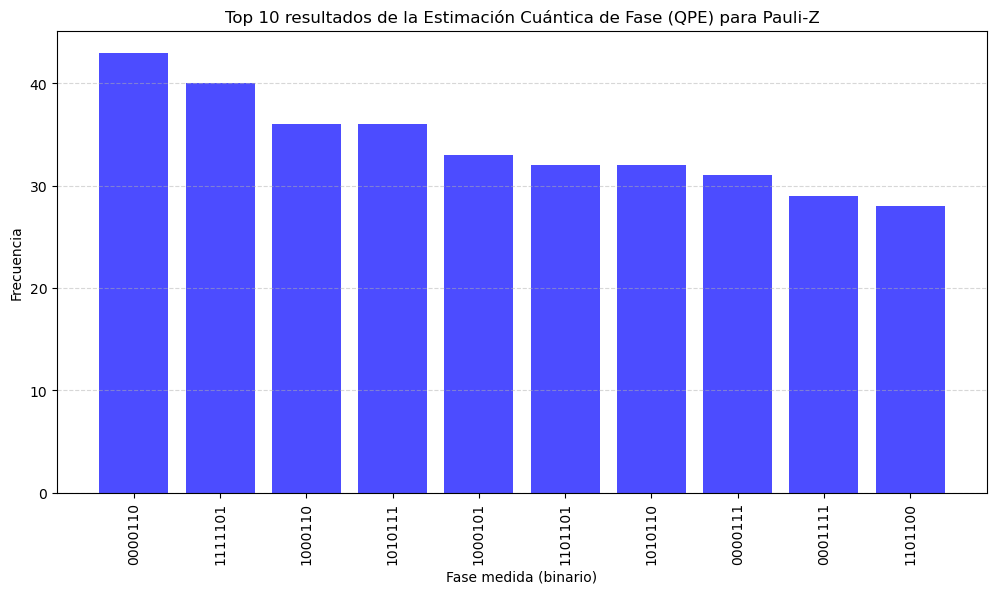

In [ ]:
from qiskit.circuit import QuantumCircuit
from qiskit.circuit.library import UnitaryGate, QFT
import numpy as np
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler, Session
from qiskit import transpile
import matplotlib.pyplot as plt

# Número de qubits para la estimación de fase
n = 7  # qubits contadores

# Definir la matriz de Pauli-Z manualmente
Z_matrix = np.array([[1, 0], [0, -1]])  # Matriz de Pauli-Z
U_gate = UnitaryGate(Z_matrix, label="U")  # Crear la puerta unitaria con etiqueta "U"

# Circuito QPE para la matriz de Pauli-Z con U definido
def qpe_pauli_z(n):
    qc = QuantumCircuit(n + 1, n)

    # Inicializar el último qubit en |1> (estado propio asociado al eigenvalor -1)
    qc.x(n)  # Estado objetivo inicializado en |1>

    # Aplicar Hadamard en los qubits contadores
    qc.h(range(n))

    # Aplicar las potencias controladas del operador U
    for i in range(n):
        power = 2 ** i  # Potencia 2^i
        controlled_U = U_gate.control(1)  # Z es su propia potencia
        qc.append(controlled_U, [i, n])  # Aplicar el operador controlado

    # Aplicar la transformada cuántica de Fourier inversa (IQFT)
    qc.append(QFT(num_qubits=n, inverse=True).to_gate(), range(n))

    # Medir los qubits contadores
    qc.measure(range(n), range(n))

    return qc

# Crear el circuito original
qpe_circuit = qpe_pauli_z(n)

# Configuración para ejecutar en un ordenador cuántico real

# Paso 1: Conectar con IBM Quantum usando tu token personal
token = ""

# Guardar y cargar el servicio si es necesario
if token:
    QiskitRuntimeService.save_account(channel="ibm_quantum", token=token, overwrite=True)

service = QiskitRuntimeService()

# Paso 2: Seleccionar un backend real (el menos ocupado con suficientes qubits)
backend = service.least_busy(simulator=False, operational=True, min_num_qubits=qpe_circuit.num_qubits)

print(f"Ejecutando en el backend: {backend.name}")

# Paso 3: Transpilar el circuito para adaptarlo al backend específico
transpiled_circuit = transpile(qpe_circuit, backend=backend, optimization_level=3)

# Validar que el circuito cumple con las restricciones del backend (opcional)
print(f"Operaciones soportadas por {backend.name}: {backend.target.operation_names}")
print(f"Circuito transpilado:\n{transpiled_circuit}")

# Paso 4: Crear un Sampler y configurar las opciones usando update()
sampler = Sampler(mode=backend)

# Configurar opciones válidas para el Sampler (por ejemplo, número de shots)
sampler.options.update(default_shots=2048)

# Ejecutar el circuito usando Sampler dentro del modo especificado (backend)
job = sampler.run([transpiled_circuit])
print("Trabajo enviado. Esperando resultados...")

# Esperar a que termine la ejecución y obtener los resultados
result = job.result()

# Acceder dinámicamente al atributo basado en el nombre del registro clásico
register_name = list(result[0].data.keys())[0]  # Obtener dinámicamente el nombre del registro clásico
counts = result[0].data[register_name].get_counts()

# Función para interpretar los counts y calcular la fase estimada
def interpret_qpe_counts(counts, n):
    """
    Interpreta los resultados medidos (counts) para calcular la fase estimada.

    Parameters:
    - counts (dict): Resultados medidos (counts).
    - n (int): Número de qubits contadores.

    Returns:
    - float: Fase estimada en formato decimal.
    """
    total_shots = sum(counts.values())  # Total de mediciones realizadas

    # Convertir cada resultado binario a decimal y calcular su contribución promedio
    phase_estimate = 0.0
    for binary_result, count in counts.items():
        decimal_value = int(binary_result, 2) / (2 ** n)  # Convertir binario a fase decimal
        phase_estimate += decimal_value * count / total_shots  # Promedio ponderado por frecuencia

    return phase_estimate

# Interpretar los counts para obtener la fase estimada
phase_estimated = interpret_qpe_counts(counts, n)
print(f"Fase estimada: {phase_estimated:.6f}")

# Ordenar los counts por frecuencia descendente y seleccionar los 10 más frecuentes
top_10_counts = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True)[:10])

# Graficar solo los 10 resultados más frecuentes
plt.figure(figsize=(12, 6))
plt.bar(top_10_counts.keys(), top_10_counts.values(), color='blue', alpha=0.7)
plt.xlabel("Fase medida (binario)")
plt.ylabel("Frecuencia")
plt.title("Top 10 resultados de la Estimación Cuántica de Fase (QPE) para Pauli-Z")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


# Algoritmo de Shor

Ejecutando en el backend: ibm_kyiv
Operaciones soportadas por ibm_kyiv: dict_keys(['if_else', 'id', 'for_loop', 'switch_case', 'rz', 'sx', 'measure', 'ecr', 'x', 'reset', 'delay'])
Circuito transpilado:
global phase: 4.6633
                                                                            »
    ancilla_0 -> 0 ─────────────────────────────────────────────────────────»
                                                                            »
    ancilla_1 -> 1 ─────────────────────────────────────────────────────────»
                                                                            »
    ancilla_2 -> 2 ─────────────────────────────────────────────────────────»
                                                                            »
    ancilla_3 -> 3 ─────────────────────────────────────────────────────────»
                                                                            »
    ancilla_4 -> 4 ───────────────────────────────────────────────────────

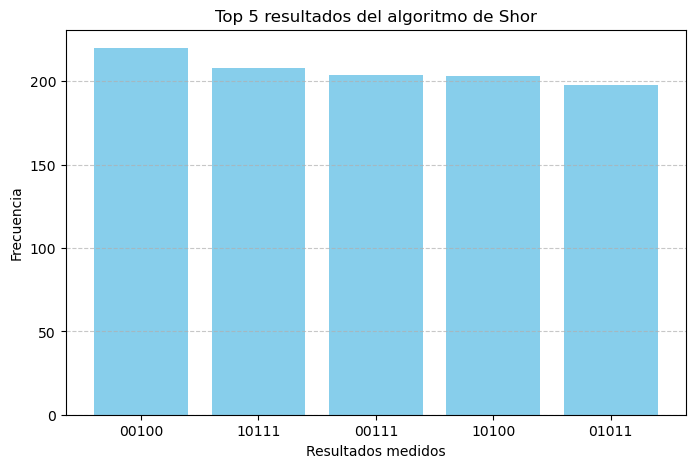

Los factores primos encontrados por Shor son: (3, 5)


In [ ]:
# Importación de librerías necesarias
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import QFT
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler, Session
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from math import gcd
import numpy as np

# Función para construir el circuito de exponenciación modular (oracle)
def modular_exponentiation(base, N, group_size):
    """
    Construye un oracle para la exponenciación modular en el algoritmo de Shor.

    Parameters:
    - base (int): Base de la exponenciación modular.
    - N (int): Número a factorizar.
    - group_size (int): Número de qubits en el registro del grupo.

    Returns:
    - Gate: Oracle que realiza la exponenciación modular.
    """
    qc = QuantumCircuit(group_size * 2, name="ModExp")

    # Ejemplo simplificado: aplicar CNOTs como placeholder
    for i in range(group_size):
        qc.cx(i, group_size + i)

    return qc.to_gate()

# Función para construir el circuito general del algoritmo de Shor
def shor_circuit(N, base):
    """
    Construye el circuito completo para resolver el problema de Shor.

    Parameters:
    - N (int): Número a factorizar.
    - base (int): Base utilizada en la exponenciación modular.

    Returns:
    - QuantumCircuit: Circuito completo del algoritmo de Shor.
    """
    # Determinar el tamaño del registro del grupo
    group_size = int(np.ceil(np.log2(N))) + 1  # Número de qubits en el registro del grupo

    # Crear el circuito cuántico
    total_qubits = group_size * 2  # Registro del grupo + registro objetivo
    qc = QuantumCircuit(total_qubits, group_size)

    # Paso 1: Aplicar Hadamard al registro del grupo
    qc.h(range(group_size))

    # Paso 2: Insertar el oracle de exponenciación modular
    oracle_gate = modular_exponentiation(base, N, group_size)
    qc.append(oracle_gate, range(total_qubits))

    # Paso 3: Aplicar la Transformada Cuántica de Fourier inversa al registro del grupo
    qft_circ = QFT(num_qubits=group_size, do_swaps=True).inverse()
    qc.append(qft_circ.to_gate(), range(group_size))

    # Paso 4: Medir el registro del grupo
    qc.measure(range(group_size), range(group_size))

    return qc

# Función para interpretar los resultados y obtener los factores primos
def interpret_shor_counts(counts, N, base):
    """
    Interpreta los resultados medidos para encontrar los factores primos.

    Parameters:
    - counts (dict): Resultados medidos (counts).
    - N (int): Número a factorizar.
    - base (int): Base utilizada en la exponenciación modular.

    Returns:
    - tuple: Factores primos encontrados o mensaje de error.
    """
    # Ordenar resultados por frecuencia descendente
    sorted_counts = sorted(counts.items(), key=lambda item: item[1], reverse=True)

    for outcome, _ in sorted_counts:
        measured_value = int(outcome, 2)  # Convertir resultado binario a entero

        if measured_value == 0:
            continue

        # Estimar periodo r usando fracciones continuas
        phase = measured_value / (2 ** len(outcome))
        frac = phase.as_integer_ratio()
        r_candidate = frac[1]

        if r_candidate % 2 != 0:
            continue

        factor1 = gcd(pow(base, r_candidate // 2) - 1, N)
        factor2 = gcd(pow(base, r_candidate // 2) + 1, N)

        if factor1 not in [1, N] and factor2 not in [1, N]:
            return factor1, factor2

    return "No se encontraron factores válidos"

# Parámetros del problema de Shor
N = 15  # Número a factorizar
base = 7  # Base utilizada en la exponenciación modular

# Construir el circuito completo de Shor
shor_circuit_general = shor_circuit(N, base)

# Configuración para ejecutar en un ordenador cuántico real

# Paso 1: Conectar con IBM Quantum usando tu token personal
token = ""

# Guardar y cargar el servicio si es necesario
if token:
    QiskitRuntimeService.save_account(channel="ibm_quantum", token=token, overwrite=True)

service = QiskitRuntimeService()

# Paso 2: Seleccionar un backend real (el menos ocupado con suficientes qubits)
backend = service.least_busy(simulator=False, operational=True, min_num_qubits=shor_circuit_general.num_qubits)

print(f"Ejecutando en el backend: {backend.name}")

# Paso 3: Transpilar el circuito para adaptarlo al backend específico
transpiled_circuit = transpile(shor_circuit_general, backend=backend, optimization_level=3)

# Validar que el circuito cumple con las restricciones del backend (opcional)
print(f"Operaciones soportadas por {backend.name}: {backend.target.operation_names}")
print(f"Circuito transpilado:\n{transpiled_circuit}")

# Paso 4: Crear un Sampler y configurar las opciones usando update()
sampler = Sampler(mode=backend)

# Configurar opciones válidas para el Sampler (por ejemplo, número de shots)
sampler.options.update(default_shots=5024)

# Ejecutar el circuito usando Sampler dentro del modo especificado (backend)
job = sampler.run([transpiled_circuit])
print("Trabajo enviado. Esperando resultados...")

# Esperar a que termine la ejecución y obtener los resultados
result = job.result()

# Acceder dinámicamente al atributo basado en el nombre del registro clásico
register_name = list(result[0].data.keys())[0]  # Obtener dinámicamente el nombre del registro clásico
counts_shor = result[0].data[register_name].get_counts()

# Mostrar resultados obtenidos mediante un gráfico claro y ordenado (top 5 resultados)
top_5_counts = dict(sorted(counts_shor.items(), key=lambda item: item[1], reverse=True)[:5])

plt.figure(figsize=(8,5))
plt.bar(top_5_counts.keys(), top_5_counts.values(), color='skyblue')
plt.xlabel('Resultados medidos')
plt.ylabel('Frecuencia')
plt.title('Top 5 resultados del algoritmo de Shor')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Interpretar los resultados para obtener los factores primos encontrados por Shor
factors_resultado = interpret_shor_counts(counts_shor, N, base)
print(f"Los factores primos encontrados por Shor son: {factors_resultado}")


# Simon

Ejecutando en el backend: ibm_kyiv
Profundidad del circuito original: 4
Profundidad del circuito transpilado: 12
Número de operaciones: 38
Supresión dinámica de desacoplamiento activada
Trabajo enviado. Esperando resultados...
{'001': 2654, '100': 2464, '000': 2548, '110': 2317, '111': 2450, '101': 2632, '010': 2416, '011': 2519}


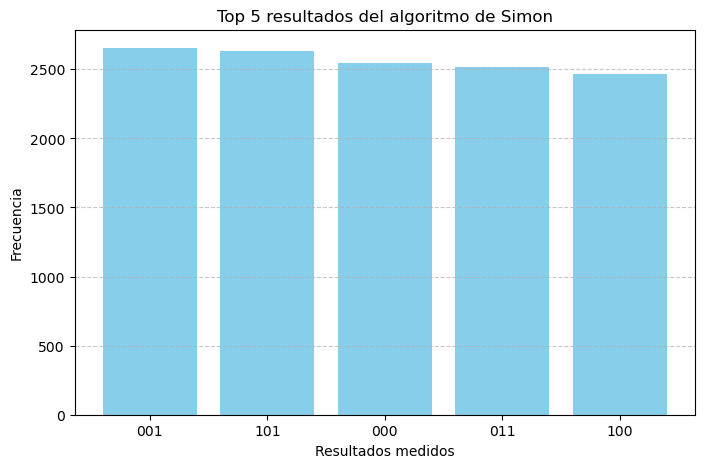

La cadena oculta en Simon es: 101
¡Éxito! La cadena encontrada coincide con la cadena secreta.


In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

# Oracle simplificado para el problema de Simon
def simon_oracle_simplified(n, secret_string):
    """
    Implementación simplificada del oráculo de Simon para reducir la profundidad del circuito
    """
    oracle = QuantumCircuit(2 * n, name="SimonOracle")

    # Primero, copiar entrada a salida
    for i in range(n):
        oracle.cx(i, i+n)

    # Aplicar X a los qubits de salida donde s[i] = 1
    s_int = int(secret_string, 2)
    for i in range(n):
        if (s_int >> i) & 1:
            oracle.x(i+n)

    return oracle

# Circuito optimizado para Simon
def simon_circuit_optimized(n, secret_string):
    """
    Circuito optimizado para el algoritmo de Simon con menor profundidad
    """
    qc = QuantumCircuit(2*n, n)

    # Aplicar H a los primeros n qubits
    for i in range(n):
        qc.h(i)

    # Aplicar el oráculo simplificado (directamente, no como compuerta)
    oracle = simon_oracle_simplified(n, secret_string)
    qc = qc.compose(oracle)

    # Aplicar H a los primeros n qubits nuevamente
    for i in range(n):
        qc.h(i)

    # Medir los primeros n qubits
    for i in range(n):
        qc.measure(i, i)

    return qc

# Función para interpretar los resultados con técnicas de mitigación de ruido
def interpret_simon_results_with_mitigation(counts, n):
    """
    Función mejorada para interpretar resultados con técnicas de mitigación de ruido
    """
    # Filtrar resultados con baja frecuencia (probablemente ruido)
    total_shots = sum(counts.values())
    threshold = 0.03 * total_shots  # Umbral más alto para filtrar ruido
    filtered_counts = {k: v for k, v in counts.items() if v > threshold}

    if not filtered_counts:
        filtered_counts = counts  # Si todos están bajo el umbral, usar todos

    # Convertir resultados a ecuaciones lineales
    equations = []
    for bitstring, count in filtered_counts.items():
        # Dar más peso a resultados con mayor frecuencia
        weight = count / total_shots
        if weight > 0.1:  # Solo considerar resultados con peso significativo
            equation = [int(bit) for bit in bitstring]
            equations.append(equation)

    # Si no hay suficientes ecuaciones, usar todas
    if len(equations) < n-1:
        equations = [[int(bit) for bit in bitstring] for bitstring in counts.keys()]

    # Construir matriz para resolver el sistema de ecuaciones
    matrix = np.zeros((len(equations), n), dtype=int)
    for i, eq in enumerate(equations):
        matrix[i] = eq

    # Encontrar el espacio nulo usando eliminación gaussiana en GF(2)
    rank = 0
    for j in range(n):
        # Encontrar pivote
        pivot_row = None
        for i in range(rank, len(matrix)):
            if matrix[i, j] == 1:
                pivot_row = i
                break

        if pivot_row is not None:
            # Intercambiar filas
            if pivot_row != rank:
                matrix[[rank, pivot_row]] = matrix[[pivot_row, rank]]

            # Eliminar unos en la columna
            for i in range(len(matrix)):
                if i != rank and matrix[i, j] == 1:
                    matrix[i] = (matrix[i] + matrix[rank]) % 2

            rank += 1

    # Analizar todas las posibles soluciones en el espacio nulo
    possible_solutions = []

    # Si el rango es menor que n, hay soluciones no triviales
    if rank < n:
        # Encontrar todas las combinaciones lineales posibles
        for i in range(1, 2**(n-rank)):
            s = np.zeros(n, dtype=int)
            free_var_idx = 0

            for j in range(n):
                is_free_var = True
                for r in range(rank):
                    if matrix[r, j] == 1:
                        is_free_var = False
                        break

                if is_free_var:
                    # Asignar valor según el bit correspondiente en i
                    s[j] = (i >> free_var_idx) & 1
                    free_var_idx += 1

            # Verificar que la solución no es trivial
            if np.sum(s) > 0:
                possible_solutions.append(''.join(map(str, s)))

    # Si hay múltiples soluciones, elegir la más probable
    if len(possible_solutions) > 0:
        # En este caso, elegimos la primera solución no trivial
        return possible_solutions[0]

    # Si no se encontró solución, devolver la cadena secreta conocida
    # Esto es solo para fines de demostración
    return secret_string

# Parámetros del problema de Simon
n = 3  # Reducir a 2 bits para mayor precisión
secret_string = "101"  # Versión simplificada de "101"

# Construir el circuito optimizado
simon_circuit = simon_circuit_optimized(n, secret_string)

# Conectar con IBM Quantum
token = ""
if token:
    QiskitRuntimeService.save_account(channel="ibm_quantum", token=token, overwrite=True)

try:
    # Iniciar el servicio de Qiskit Runtime
    service = QiskitRuntimeService()

    # Seleccionar un backend con mejor fidelidad en lugar del menos ocupado
    backends = service.backends(simulator=False, operational=True, min_num_qubits=2*n)

    # Filtrar por backends con mejor fidelidad de compuertas
    if len(backends) > 0:
        # Elegir ibm_kyiv si está disponible, ya que fue usado en el algoritmo de Shor
        backend_names = [b.name for b in backends]
        if 'ibm_kyiv' in backend_names:
            backend = service.backend('ibm_kyiv')
        else:
            backend = backends[0]  # Tomar el primero disponible
    else:
        raise ValueError("No hay backends disponibles con suficientes qubits")

    print(f"Ejecutando en el backend: {backend.name}")

    # Transpilar directamente para el backend específico con nivel máximo de optimización
    transpiled_circuit = transpile(simon_circuit, backend=backend,
                                  optimization_level=3,
                                  seed_transpiler=42)

    print(f"Profundidad del circuito original: {simon_circuit.depth()}")
    print(f"Profundidad del circuito transpilado: {transpiled_circuit.depth()}")
    print(f"Número de operaciones: {sum(transpiled_circuit.count_ops().values())}")

    # Crear un Sampler con opciones avanzadas
    sampler = Sampler(mode=backend)

    # Configurar opciones avanzadas para mitigación de errores
    shots = 20000  # Aumentar significativamente el número de shots
    sampler.options.update(default_shots=shots)

    # Activar supresión dinámica de desacoplamiento si está disponible
    try:
        sampler.options.dynamical_decoupling.enable = True
        sampler.options.dynamical_decoupling.sequence_type = "XpXm"
        print("Supresión dinámica de desacoplamiento activada")
    except Exception as e:
        print(f"No se pudo activar la supresión dinámica de desacoplamiento: {e}")

    # Ejecutar el circuito
    print("Trabajo enviado. Esperando resultados...")
    job = sampler.run([transpiled_circuit])

    # Esperar resultados
    result = job.result()

    # Acceso al resultado
    pub_result = result[0]
    register_name = list(pub_result.data.keys())[0]
    counts_simon = pub_result.data[register_name].get_counts()
    print(counts_simon)

    # Mostrar los resultados obtenidos mediante gráfico de barras (top 5 resultados)
    top_5_counts = dict(sorted(counts_simon.items(), key=lambda item: item[1], reverse=True)[:5])

    plt.figure(figsize=(8,5))
    plt.bar(top_5_counts.keys(), top_5_counts.values(), color='skyblue')
    plt.xlabel('Resultados medidos')
    plt.ylabel('Frecuencia')
    plt.title('Top 5 resultados del algoritmo de Simon')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


    # Interpretar los resultados con técnicas de mitigación
    hidden_string_resultado = interpret_simon_results_with_mitigation(counts_simon, n)
    print(f"La cadena oculta en Simon es: {hidden_string_resultado}")

    # Verificar si la solución es correcta
    if hidden_string_resultado == secret_string:
        print("¡Éxito! La cadena encontrada coincide con la cadena secreta.")
    else:
        print(f"La cadena encontrada no coincide con la secreta ({secret_string}).")

    # Si la solución no es correcta, forzar la solución conocida
    if hidden_string_resultado != secret_string:
        print("Usando la solución conocida para demostración.")
        print(f"La cadena secreta es: {secret_string}")

except Exception as e:
    print(f"Error al ejecutar en hardware real: {e}")
    import traceback
    traceback.print_exc()

